# Metodos Computacionales 
## Universidad de los Andes

## Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

## GPU

In [ ]:
!nvidia-smi

Wed Mar 30 16:24:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## MNIST Data Set

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

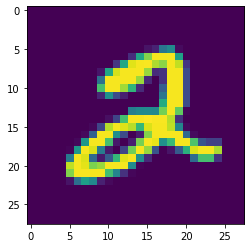

In [ ]:
plt.imshow(X_train[5])

In [ ]:
# Set the training parameters of the CNN Feature Extractor
num_classes = 10
epochs = 10
batch_size = 128

In [ ]:
# Select the indices for the binary classification
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

# convert class vectors to binary class matrices for the CNN feature Extractor
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# reshape the X_train_n , and X_test_n, 
n_train = X_train.shape[0]
n_test = X_test.shape[0]
l_side = X_test.shape[1]
X_train = X_train.reshape((n_train, l_side**2))/255
X_test = X_test.reshape((n_test, l_side**2))/255

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

## Neural Dense Layers 

In [ ]:
# Set the activation type

# Define a CNN feature extraction model
input_shape = X_train.shape[1:]
model = Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=input_shape))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compile and run
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 2.4218 - accuracy: 0.0774 - val_loss: 2.3661 - val_accuracy: 0.0895
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3336 - accuracy: 0.1116 - val_loss: 2.2800 - val_accuracy: 0.1405
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2520 - accuracy: 0.1676 - val_loss: 2.2008 - val_accuracy: 0.2064
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 2.1765 - accuracy: 0.2393 - val_loss: 2.1270 - val_accuracy: 0.2854
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 2.1056 - accuracy: 0.3138 - val_loss: 2.0572 - val_accuracy: 0.3695
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 2.0383 - accuracy: 0.3854 - val_loss: 1.9902 - val_accuracy: 0.4482
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 1.9735 - accuracy: 0.4493 - val_loss: 1.9254 - val_accuracy: 0.5127
Epoch 

## Convolutional Neural Networks

In [ ]:
(X_train, a1), (X_test, a2)  = mnist.load_data()

# Renormalize pixel values
X_train = X_train[:, :, :, tf.newaxis] / 255
X_test = X_test[:, :, :, tf.newaxis] / 255

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# Set the activation type

# Define a CNN feature extraction model
input_shape = X_train.shape[1:]
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [ ]:
# Compile and run
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 16s 18ms/step - loss: 2.2823 - accuracy: 0.1455 - val_loss: 2.2516 - val_accuracy: 0.2904
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 2.2327 - accuracy: 0.2391 - val_loss: 2.1889 - val_accuracy: 0.4140
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 2.1677 - accuracy: 0.3294 - val_loss: 2.1069 - val_accuracy: 0.4826
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 2.0819 - accuracy: 0.4058 - val_loss: 1.9982 - val_accuracy: 0.5816
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 1.9700 - accuracy: 0.4757 - val_loss: 1.8556 - val_accuracy: 0.6480
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 1.8251 - accuracy: 0.5386 - val_loss: 1.6791 - val_accuracy: 0.6913
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 1.6628 - accuracy: 0.5834 - val_loss: 1.4815 - val_accuracy: 0.722

## Gradient Descent Algorithm

In [ ]:
def f(x):
    return x**2 - 4*x + 2

def df(x):
    return 2**x - 4
    
next_pt = 5
e = 0.01
f_np1 = 0
for n in range(300):
    f_np1 = f(next_pt) - e * df(next_pt)
    if f_np1 > f(next_pt):
        break
    next_pt = next_pt - e
    if n % 10 == 0:
      print(next_pt)
    
print(f_np1, next_pt)

4.99
4.890000000000002
4.7900000000000045
4.690000000000007
4.590000000000009
4.490000000000011
4.390000000000013
4.290000000000015
4.190000000000017
4.090000000000019
3.9900000000000215
3.8900000000000237
3.790000000000026
3.690000000000028
3.59000000000003
3.490000000000032
3.3900000000000343
3.2900000000000365
3.1900000000000386
3.0900000000000407
2.990000000000043
2.890000000000045
2.790000000000047
2.6900000000000492
2.5900000000000514
2.4900000000000535
2.3900000000000556
2.2900000000000578
2.19000000000006
2.090000000000062
-2.000178222002269 2.000000000000064
